In [164]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the data from the CSV file
data = pd.read_csv('AAPL_sentiment.csv')

# Display the first few rows to understand the structure
data.head()

,datetime,title,source,link,sentiment_class,sentiment_score
0,5/19/2011 9:53:02 AM,"Google, Apple not unassailable in smartphone race",Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,neutral,0.888337
1,5/21/2011 5:33:49 AM,Apple probes blast at Chinese plant linked to ...,Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,negative,0.798660
2,6/5/2011 7:56:02 PM,Apple readies latest version of the halo effect,Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,neutral,0.936373
3,6/6/2011 9:33:12 PM,"Wall Street extends losses as banks, Apple drag",Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,negative,0.880869
4,6/11/2011 7:36:28 AM,Apple recalls some Verizon iPad 2 tablets,Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,neutral,0.628117


In [166]:
# Convert the 'datetime' column to a datetime object and extract just the date part
# Use pd.to_datetime with format='mixed' to handle the AM/PM format
data['datetime'] = pd.to_datetime(data['datetime'], format='mixed')

# Extract only the date part (without time)and use it as the index
data['datetime'] = data['datetime'].dt.date



data.set_index('datetime', inplace=True)

data.head()

,title,source,link,sentiment_class,sentiment_score
datetime,,,,,
2011-05-19,"Google, Apple not unassailable in smartphone race",Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,neutral,0.888337
2011-05-21,Apple probes blast at Chinese plant linked to ...,Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,negative,0.798660
2011-06-05,Apple readies latest version of the halo effect,Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,neutral,0.936373
2011-06-06,"Wall Street extends losses as banks, Apple drag",Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,negative,0.880869
2011-06-11,Apple recalls some Verizon iPad 2 tablets,Reuters,http://feeds.reuters.com/~r/reuters/INbusiness...,neutral,0.628117


<Axes: xlabel='sentiment_class'>

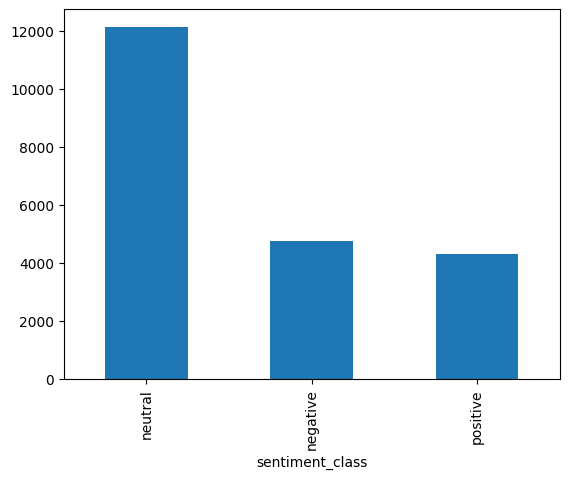

In [167]:
#plot the sentiment class counts
data['sentiment_class'].value_counts().plot(kind='bar')

In [168]:
# Group by date and sentiment class to calculate aggregate sentiment
# First, create a group by date and sentiment class
grouped = data.groupby([data.index, 'sentiment_class'])

# Calculate the sum and count for each sentiment class per day
class_scores = grouped['sentiment_score'].agg(['sum', 'count']).unstack(fill_value=0)

# Get the totals for each sentiment class per day
class_totals = class_scores['sum']
class_counts = class_scores['count']

# Find the class with the highest total score for each day
winning_class = class_totals.idxmax(axis=1)

# Calculate the average score for the winning class
daily_sentiment = pd.DataFrame(index=class_totals.index)
daily_sentiment['sentiment_class'] = winning_class
daily_sentiment['count'] = [class_counts.loc[idx, cls] for idx, cls in zip(daily_sentiment.index, winning_class)]
daily_sentiment['total_score'] = [class_totals.loc[idx, cls] for idx, cls in zip(daily_sentiment.index, winning_class)]
daily_sentiment['sentiment_score'] = daily_sentiment['total_score'] / daily_sentiment['count']
daily_sentiment['positive_count'] = class_counts['positive']
daily_sentiment['negative_count'] = class_counts['negative']
daily_sentiment['neutral_count'] = class_counts['neutral']

# Calculate the average score for the winning class

# Convert index to datetime for proper date handling
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)
# replace the sentiment class with the winning class and the sentiment score with the weighted average
data['sentiment_class'] = daily_sentiment['sentiment_class']

# Display the daily aggregate sentiment scores
print("Daily aggregate sentiment scores:")
print(daily_sentiment.tail(10))

Daily aggregate sentiment scores:
           sentiment_class  count  total_score  sentiment_score  \
datetime                                                          
2025-02-21         neutral      9     7.347970         0.816441   
2025-02-22         neutral      1     0.892578         0.892578   
2025-02-23        positive      1     0.940164         0.940164   
2025-02-24         neutral     14    11.366338         0.811881   
2025-02-25        negative      5     3.841420         0.768284   
2025-02-26         neutral     10     8.077543         0.807754   
2025-02-27         neutral      4     3.340572         0.835143   
2025-02-28        negative      5     4.435416         0.887083   
2025-03-03        negative      6     4.326166         0.721028   
2025-03-04         neutral      5     3.724063         0.744813   

            positive_count  negative_count  neutral_count  
datetime                                                   
2025-02-21               2               

In [169]:
# Create a complete date range from the first to last date in our data
date_range = pd.date_range(start=daily_sentiment.index.min(), end=daily_sentiment.index.max(), freq='D')

# Reindex the data to include all dates in the range
daily_sentiment = daily_sentiment.reindex(date_range)

# Forward fill missing days with the previous day's data
daily_sentiment['sentiment_score'] = daily_sentiment['sentiment_score'].fillna(method='ffill')
daily_sentiment['sentiment_class'] = daily_sentiment['sentiment_class'].fillna(method='ffill')

# Display the results after backfilling
print("Aggregate sentiment for each day (after backfilling missing days):")
print(daily_sentiment[['sentiment_class', 'sentiment_score']].head(10))

Aggregate sentiment for each day (after backfilling missing days):
           sentiment_class  sentiment_score
2011-05-19         neutral         0.888337
2011-05-20        negative         0.798660
2011-05-21        negative         0.798660
2011-05-22         neutral         0.936373
2011-05-23         neutral         0.936373
2011-05-24         neutral         0.936373
2011-05-25         neutral         0.936373
2011-05-26         neutral         0.936373
2011-05-27         neutral         0.936373
2011-05-28         neutral         0.936373


C:\Users\ahmed\AppData\Local\Temp\ipykernel_26744\2892329670.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_sentiment['sentiment_score'] = daily_sentiment['sentiment_score'].fillna(method='bfill')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_26744\2892329670.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_sentiment['sentiment_class'] = daily_sentiment['sentiment_class'].fillna(method='bfill')


(5039, 7)


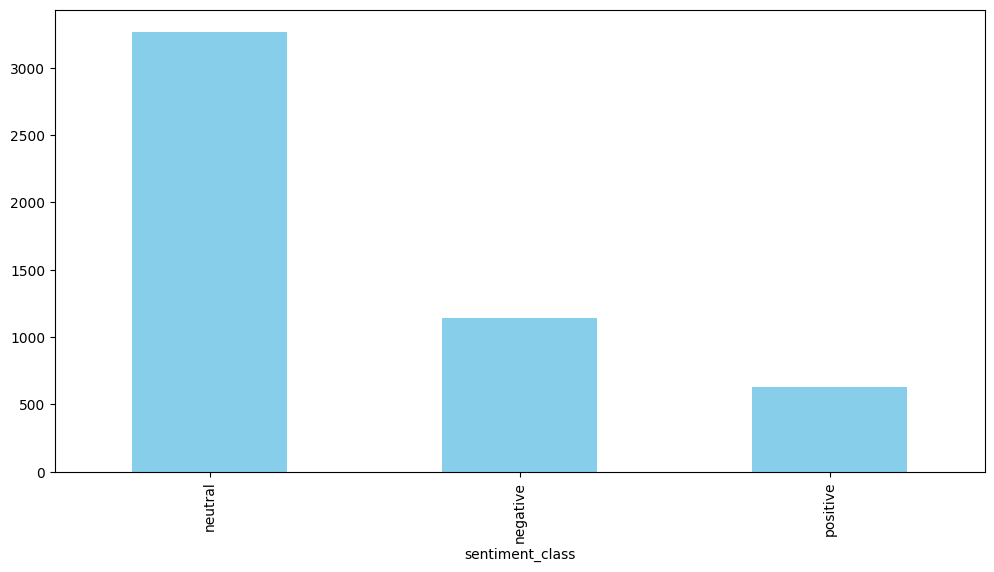

In [170]:
#plot the sentiment classes count for the complete data set
plt.figure(figsize=(12, 6))
daily_sentiment['sentiment_class'].value_counts().plot(kind='bar', color='skyblue')
print (daily_sentiment.shape)

In [171]:
daily_sentiment.head()


,sentiment_class,count,total_score,sentiment_score,positive_count,negative_count,neutral_count
2011-05-19,neutral,1.0,0.888337,0.888337,0.0,0.0,1.0
2011-05-20,negative,NaN,NaN,0.798660,NaN,NaN,NaN
2011-05-21,negative,1.0,0.798660,0.798660,0.0,1.0,0.0
2011-05-22,neutral,NaN,NaN,0.936373,NaN,NaN,NaN
2011-05-23,neutral,NaN,NaN,0.936373,NaN,NaN,NaN


In [172]:
# Create a weighted sentiment score based on both class and probability

# First, map sentiment classes to numeric values
# Assuming sentiment_class contains values like 'positive', 'negative', 'neutral'
class_map = {
    'positive': 1,
    'negative': -1,
    'neutral': 0.01
    # Add any other classes that might exist in your data
}

# Create a weighted sentiment that combines class and score
daily_sentiment['weighted_sentiment'] = daily_sentiment['sentiment_class'].map(class_map) * daily_sentiment['sentiment_score']

# Calculate indicators using the weighted sentiment
# 1. Simple Moving Averages (5-day and 10-day)
daily_sentiment['Weighted_SMA_5'] = daily_sentiment['weighted_sentiment'].rolling(window=5).mean()
daily_sentiment['Weighted_SMA_10'] = daily_sentiment['weighted_sentiment'].rolling(window=10).mean()

# 2. Momentum (difference between current value and 5 days ago)
daily_sentiment['Weighted_Momentum'] = daily_sentiment['weighted_sentiment'] - daily_sentiment['weighted_sentiment'].shift(5)

# 3. Volatility (10-day rolling standard deviation)
daily_sentiment['Weighted_Volatility'] = daily_sentiment['weighted_sentiment'].rolling(window=10).std()

# 4. Crossing signals (when 5-day SMA crosses 10-day SMA)
daily_sentiment['Signal_Cross'] = np.where(
    daily_sentiment['Weighted_SMA_5'] > daily_sentiment['Weighted_SMA_10'], 1, 
    np.where(daily_sentiment['Weighted_SMA_5'] < daily_sentiment['Weighted_SMA_10'], -1, 0)
)

# Show the results
print("Weighted sentiment indicators calculated using both class and score")
display_cols = ['sentiment_class', 'sentiment_score', 'weighted_sentiment', 
                'Weighted_SMA_5', 'Weighted_SMA_10', 'Weighted_Momentum',
                'Weighted_Volatility', 'Signal_Cross']
daily_sentiment[display_cols].head(15)

Weighted sentiment indicators calculated using both class and score


,sentiment_class,sentiment_score,weighted_sentiment,Weighted_SMA_5,Weighted_SMA_10,Weighted_Momentum,Weighted_Volatility,Signal_Cross
2011-05-19,neutral,0.888337,0.008883,NaN,NaN,NaN,NaN,0
2011-05-20,negative,0.798660,-0.798660,NaN,NaN,NaN,NaN,0
2011-05-21,negative,0.798660,-0.798660,NaN,NaN,NaN,NaN,0
2011-05-22,neutral,0.936373,0.009364,NaN,NaN,NaN,NaN,0
2011-05-23,neutral,0.936373,0.009364,-0.313942,NaN,NaN,NaN,0
2011-05-24,neutral,0.936373,0.009364,-0.313846,NaN,0.000480,NaN,0
2011-05-25,neutral,0.936373,0.009364,-0.152241,NaN,0.808024,NaN,0
2011-05-26,neutral,0.936373,0.009364,0.009364,NaN,0.808024,NaN,0
2011-05-27,neutral,0.936373,0.009364,0.009364,NaN,0.000000,NaN,0
2011-05-28,neutral,0.936373,0.009364,0.009364,-0.152289,0.000000,0.340667,1


In [177]:
daily_sentiment.describe()

,count,total_score,sentiment_score,positive_count,negative_count,neutral_count,weighted_sentiment,Weighted_SMA_5,Weighted_SMA_10,Weighted_Momentum,Weighted_Volatility,Signal_Cross
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,2.805372,2.340336,0.820405,0.864702,0.952095,2.432351,-0.085109,-0.084934,-0.084682,-0.000617,0.353250,-0.014031
std,3.854460,3.284375,0.107176,1.903742,2.438068,3.323039,0.484399,0.341944,0.288741,0.617099,0.207343,0.982711
min,0.000000,0.000000,0.364906,0.000000,0.000000,0.000000,-0.974707,-0.969650,-0.966326,-1.910913,0.000000,-1.000000
25%,0.000000,0.000000,0.778343,0.000000,0.000000,0.000000,0.005838,-0.188409,-0.204964,-0.003021,0.255628,-1.000000
50%,1.000000,0.937644,0.846367,0.000000,0.000000,1.000000,0.008272,0.007911,-0.013000,0.000000,0.380165,0.000000
75%,4.000000,3.618064,0.896153,1.000000,1.000000,4.000000,0.008994,0.009306,0.080244,0.002355,0.482476,1.000000
max,85.000000,78.638366,0.974707,35.000000,85.000000,44.000000,0.957060,0.949309,0.885284,1.919075,0.937476,1.000000


In [173]:
daily_sentiment['count'] = daily_sentiment['count'].fillna(0)
daily_sentiment['total_score'] = daily_sentiment['total_score'].fillna(0)
daily_sentiment['positive_count'] = daily_sentiment['positive_count'].fillna(0)
daily_sentiment['negative_count'] = daily_sentiment['negative_count'].fillna(0)
daily_sentiment['neutral_count'] = daily_sentiment['neutral_count'].fillna(0)
daily_sentiment['date'] = daily_sentiment.index
daily_sentiment.index=daily_sentiment['date']
daily_sentiment=daily_sentiment.drop(columns='date')
#drop the first 50 rows
daily_sentiment = daily_sentiment[50:]
daily_sentiment.head()

,sentiment_class,count,total_score,sentiment_score,positive_count,negative_count,neutral_count,weighted_sentiment,Weighted_SMA_5,Weighted_SMA_10,Weighted_Momentum,Weighted_Volatility,Signal_Cross
date,,,,,,,,,,,,,
2011-07-08,neutral,0.0,0.0,0.689133,0.0,0.0,0.0,0.006891,0.006891,0.007427,0.0,0.000862,-1
2011-07-09,neutral,0.0,0.0,0.689133,0.0,0.0,0.0,0.006891,0.006891,0.007248,0.0,0.000752,-1
2011-07-10,neutral,0.0,0.0,0.689133,0.0,0.0,0.0,0.006891,0.006891,0.007070,0.0,0.000564,-1
2011-07-11,neutral,0.0,0.0,0.689133,0.0,0.0,0.0,0.006891,0.006891,0.006891,0.0,0.000000,0
2011-07-12,neutral,0.0,0.0,0.689133,0.0,0.0,0.0,0.006891,0.006891,0.006891,0.0,0.000000,0


In [174]:
# check for missing values
daily_sentiment.isnull().sum()

sentiment_class        0
count                  0
total_score            0
sentiment_score        0
positive_count         0
negative_count         0
neutral_count          0
weighted_sentiment     0
Weighted_SMA_5         0
Weighted_SMA_10        0
Weighted_Momentum      0
Weighted_Volatility    0
Signal_Cross           0
dtype: int64

In [175]:
historical_data = pd.read_csv('AAPL_historical.csv')
#make the date column the index and convert it to a datetime object with day and month and year

#historical_data['date'] = pd.to_datetime(historical_data['date'], format='%d/%m/%Y') 

# First convert date to datetime
historical_data['date'] = pd.to_datetime(historical_data['date'], format='mixed')
# Then set it as index
historical_data.set_index('date', inplace=True)
# Extract only the date part (without time)


historical_data.head()

,close,volume,open,high,low
date,,,,,
2025-03-13,209.68,61368330,215.950,216.8394,208.42
2025-03-12,216.98,62547470,220.140,221.7500,214.91
2025-03-11,220.84,76137410,223.805,225.8399,217.45
2025-03-10,227.48,72071200,235.540,236.1600,224.22
2025-03-07,239.07,46273570,235.105,241.3700,234.76


In [176]:
historical_data.head()


,close,volume,open,high,low
date,,,,,
2025-03-13,209.68,61368330,215.950,216.8394,208.42
2025-03-12,216.98,62547470,220.140,221.7500,214.91
2025-03-11,220.84,76137410,223.805,225.8399,217.45
2025-03-10,227.48,72071200,235.540,236.1600,224.22
2025-03-07,239.07,46273570,235.105,241.3700,234.76


In [ ]:
date_range = pd.date_range(start=historical_data.index.min(), end=historical_data.index.max(), freq='D')
historical_data = historical_data.reindex(date_range)
historical_data = historical_data.fillna(method='ffill')
historical_data.head(20)
#reverse the sort of the data
historical_data = historical_data.sort_index()
historical_data['date'] = historical_data.index
historical_data.index=historical_data['date']
historical_data=historical_data.drop(columns='date')
historical_data.head()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_26744\3484778176.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_data = historical_data.fillna(method='bfill')


,close,volume,open,high,low
date,,,,,
2015-03-16,31.2375,143265200.0,30.9700,31.2375,30.7175
2015-03-17,31.7600,203564920.0,31.4750,31.8300,31.4125
2015-03-18,32.1175,260472680.0,31.7500,32.2900,31.5925
2015-03-19,31.8738,182698080.0,32.1875,32.3113,31.8500
2015-03-20,31.4750,274064720.0,32.0625,32.1000,31.2900


In [188]:
historical_data.isnull().sum()


close     0
volume    0
open      0
high      0
low       0
dtype: int64

In [189]:
import numpy as np

# Calculate technical indicators for historical data

# Simple Moving Averages (SMA)
historical_data['SMA_5'] = historical_data['close'].rolling(window=5).mean()
historical_data['SMA_10'] = historical_data['close'].rolling(window=10).mean()

# Exponential Moving Averages (EMA)
historical_data['EMA_5'] = historical_data['close'].ewm(span=5, adjust=False).mean()
historical_data['EMA_10'] = historical_data['close'].ewm(span=10, adjust=False).mean()

# MACD (Moving Average Convergence Divergence)
historical_data['EMA_12'] = historical_data['close'].ewm(span=12, adjust=False).mean()
historical_data['EMA_26'] = historical_data['close'].ewm(span=26, adjust=False).mean()
historical_data['MACD'] = historical_data['EMA_12'] - historical_data['EMA_26']
historical_data['MACD_Signal'] = historical_data['MACD'].ewm(span=9, adjust=False).mean()

# RSI (Relative Strength Index)
delta = historical_data['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.ewm(com=13, adjust=False).mean()
avg_loss = loss.ewm(com=13, adjust=False).mean()
rs = avg_gain / avg_loss.replace(0, np.finfo(float).eps)
historical_data['RSI_14'] = 100 - (100 / (1 + rs))

# Round the calculated indicators to 4 decimal places
for col in ['SMA_5', 'SMA_10', 'EMA_5', 'EMA_10', 'MACD', 'MACD_Signal', 'RSI_14']:
    historical_data[col] = historical_data[col].round(4)

# Display the calculated indicators
historical_data[['close', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10', 'MACD', 'MACD_Signal', 'RSI_14']].head(15)

,close,SMA_5,SMA_10,EMA_5,EMA_10,MACD,MACD_Signal,RSI_14
date,,,,,,,,
2015-03-16,31.2375,NaN,NaN,31.2375,31.2375,0.0000,0.0000,0.0000
2015-03-17,31.7600,NaN,NaN,31.4117,31.3325,0.0417,0.0083,100.0000
2015-03-18,32.1175,NaN,NaN,31.6469,31.4752,0.1024,0.0271,100.0000
2015-03-19,31.8738,NaN,NaN,31.7226,31.5477,0.1293,0.0476,76.2519
2015-03-20,31.4750,31.6928,NaN,31.6400,31.5345,0.1172,0.0615,53.7547
2015-03-21,31.8025,31.8058,NaN,31.6942,31.5832,0.1324,0.0757,63.3243
2015-03-22,31.8025,31.8143,NaN,31.7303,31.6231,0.1429,0.0891,63.3243
2015-03-23,31.8025,31.7513,NaN,31.7544,31.6557,0.1494,0.1012,63.3243
2015-03-24,31.6725,31.7110,NaN,31.7271,31.6588,0.1425,0.1094,57.4322


In [191]:
#drop the first 50 rows
historical_data = historical_data[50:]
historical_data.head()

,close,volume,open,high,low,SMA_5,SMA_10,EMA_5,EMA_10,EMA_12,EMA_26,MACD,MACD_Signal,RSI_14
date,,,,,,,,,,,,,,
2015-06-24,32.0275,220310080.0,31.8025,32.4500,31.7800,31.8985,31.8568,31.8989,31.8921,31.902552,32.002818,-0.1003,-0.1178,50.5074
2015-06-25,31.8750,127489560.0,32.2150,32.3000,31.8750,31.8930,31.8712,31.8909,31.8890,31.898313,31.993350,-0.0950,-0.1132,46.7777
2015-06-26,31.6875,175945160.0,31.9175,31.9975,31.6275,31.8500,31.8500,31.8231,31.8524,31.865880,31.970694,-0.1048,-0.1116,42.6113
2015-06-27,31.1325,196173640.0,31.3650,31.6175,31.1200,31.6960,31.7808,31.5929,31.7215,31.753053,31.908606,-0.1556,-0.1204,33.1884
2015-06-28,31.1325,196173640.0,31.3650,31.6175,31.1200,31.5710,31.6970,31.4394,31.6144,31.657583,31.851117,-0.1935,-0.1350,33.1884


In [195]:
daily_sentiment.tail()


,sentiment_class,count,total_score,sentiment_score,positive_count,negative_count,neutral_count,weighted_sentiment,Weighted_SMA_5,Weighted_SMA_10,Weighted_Momentum,Weighted_Volatility,Signal_Cross
date,,,,,,,,,,,,,
2025-02-28,negative,5.0,4.435416,0.887083,1.0,5.0,2.0,-0.887083,-0.326164,-0.065787,-1.827247,0.496463,-1
2025-03-01,negative,0.0,0.000000,0.721028,0.0,0.0,0.0,-0.721028,-0.471993,-0.138690,-0.729147,0.536348,-1
2025-03-02,negative,0.0,0.000000,0.721028,0.0,0.0,0.0,-0.721028,-0.462542,-0.211562,0.047256,0.563088,-1
2025-03-03,negative,6.0,4.326166,0.721028,3.0,6.0,4.0,-0.721028,-0.608363,-0.284481,-0.729105,0.578476,-1
2025-03-04,neutral,5.0,3.724063,0.744813,2.0,0.0,5.0,0.007448,-0.608544,-0.284629,-0.000903,0.578393,-1


In [194]:
daily_sentiment.tail()
#merge the historical data with the daily sentiment data on the date column
merged_data = pd.merge(historical_data, daily_sentiment, on='date', how='inner')
merged_data.tail()


,close,volume,open,high,low,SMA_5,SMA_10,EMA_5,EMA_10,EMA_12,...,sentiment_score,positive_count,negative_count,neutral_count,weighted_sentiment,Weighted_SMA_5,Weighted_SMA_10,Weighted_Momentum,Weighted_Volatility,Signal_Cross
date,,,,,,,,,,,,,,,,,,,,,
2025-02-28,241.84,56833360.0,236.950,242.0900,230.200,242.728,244.409,242.0320,242.7675,242.618468,...,0.887083,1.0,5.0,2.0,-0.887083,-0.326164,-0.065787,-1.827247,0.496463,-1
2025-03-01,238.03,47183990.0,241.790,244.0272,236.112,240.914,243.725,240.6980,241.9062,241.912550,...,0.721028,0.0,0.0,0.0,-0.721028,-0.471993,-0.138690,-0.729147,0.536348,-1
2025-03-02,238.03,47183990.0,241.790,244.0272,236.112,239.112,242.945,239.8087,241.2014,241.315234,...,0.721028,0.0,0.0,0.0,-0.721028,-0.462542,-0.211562,0.047256,0.563088,-1
2025-03-03,238.03,47183990.0,241.790,244.0272,236.112,238.646,242.193,239.2158,240.6248,240.809814,...,0.721028,3.0,6.0,4.0,-0.721028,-0.608363,-0.284481,-0.729105,0.578476,-1
2025-03-04,235.93,53798060.0,237.705,240.0700,234.680,238.372,241.076,238.1205,239.7712,240.059073,...,0.744813,2.0,0.0,5.0,0.007448,-0.608544,-0.284629,-0.000903,0.578393,-1


In [197]:
merged_data.shape


(3542, 27)

In [199]:
merged_data.to_csv('AAPL_merged_data.csv', index=True)